In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import ttest_rel
import statistics

In [685]:
palette = sns.color_palette("deep")
sns.set_palette(palette)

In [686]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:00<00:00, 76.8MB/s]


In [687]:
df = pd.read_csv('delhivery_data.csv?1642751181')

Basic Data Cleaning and exploration

In [688]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [689]:
df.shape

(144867, 24)

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [691]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [692]:
{i : df[i].nunique() for i in df.columns}

{'data': 2,
 'trip_creation_time': 14817,
 'route_schedule_uuid': 1504,
 'route_type': 2,
 'trip_uuid': 14817,
 'source_center': 1508,
 'source_name': 1498,
 'destination_center': 1481,
 'destination_name': 1468,
 'od_start_time': 26369,
 'od_end_time': 26369,
 'start_scan_to_end_scan': 1915,
 'is_cutoff': 2,
 'cutoff_factor': 501,
 'cutoff_timestamp': 93180,
 'actual_distance_to_destination': 144515,
 'actual_time': 3182,
 'osrm_time': 1531,
 'osrm_distance': 138046,
 'factor': 45641,
 'segment_actual_time': 747,
 'segment_osrm_time': 214,
 'segment_osrm_distance': 113799,
 'segment_factor': 5675}

In [693]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [694]:
df.describe(include = object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


Handling Null Values

In [695]:
a1 = df[pd.isna(df['source_name'])]['source_center'].unique()

In [696]:
b1 = pd.DataFrame((df[df['source_center'].isin(a1)][['source_center','source_name']]).groupby('source_center').agg(lambda x: list(set(x)))).sort_index().reset_index()
b1

,source_center,source_name
0,IND126116AAA,[nan]
1,IND282002AAD,[nan]
2,IND331022A1B,[nan]
3,IND342902A1B,[nan]
4,IND465333A1B,[nan]
5,IND505326AAB,[nan]
6,IND509103AAC,[nan]
7,IND577116AAA,[nan]
8,IND841301AAC,[nan]
9,IND852118A1B,[nan]


In [697]:
a2 = df[pd.isna(df['destination_name'])]['destination_center'].unique()

In [698]:
b2 = pd.DataFrame((df[df['destination_center'].isin(a2)][['destination_center','destination_name']]).groupby('destination_center').agg(lambda x: list(set(x)))).sort_index().reset_index()
b2

,destination_center,destination_name
0,IND122015AAC,[nan]
1,IND126116AAA,[nan]
2,IND221005A1A,[nan]
3,IND250002AAC,[nan]
4,IND282002AAD,[nan]
5,IND331001A1C,[nan]
6,IND342902A1B,[nan]
7,IND465333A1B,[nan]
8,IND505326AAB,[nan]
9,IND509103AAC,[nan]


In [699]:
destination_list = (df[df['destination_name'].notna()][['destination_center','destination_name']]).groupby(['destination_center']).agg({'destination_name' : 'first'})
source_list = (df[df['source_name'].notna()][['source_center','source_name']]).groupby(['source_center']).agg({'source_name' : 'first'})

In [700]:
([b1.isin(destination_list.iloc[:,0])],[b2.isin(source_list.iloc[:,0])])

([   source_center  source_name
  0          False        False
  1          False        False
  2          False        False
  3          False        False
  4          False        False
  5          False        False
  6          False        False
  7          False        False
  8          False        False
  9          False        False],
 [    destination_center  destination_name
  0                False             False
  1                False             False
  2                False             False
  3                False             False
  4                False             False
  5                False             False
  6                False             False
  7                False             False
  8                False             False
  9                False             False
  10               False             False
  11               False             False
  12               False             False])

In [701]:
df[df['source_name'].isna() & df['destination_center'].isna()].shape

(0, 24)

As above analysis on the Null values in Source and Destination Centers and Name, it shows that there are 10 and 13 missing Names respectively and all are different in both the groups. In total for 23 Centers the Name values are missing. As there are no missing values for both Destination name and Source Name. So replacing all the missing values with the 'Unknown' values.

In [702]:
df.fillna('Unknown',inplace = True)

In [703]:
(df.isnull().sum())

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [704]:
#scan to whether convert the dtype of some columns to int or float. if the shape of output is (0,) then it is integer otherwise float attribute.
columns_to_check = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

colums_division = {i: (df[df[i] % 1 != 0][i].unique().shape) for i in columns_to_check}

print(colums_division)
#this proves that there are no float values in the attribute, the dtype can be changed to int.

{'start_scan_to_end_scan': (0,), 'actual_distance_to_destination': (144515,), 'actual_time': (0,), 'osrm_time': (0,), 'osrm_distance': (138031,), 'factor': (45617,), 'segment_actual_time': (0,), 'segment_osrm_time': (0,), 'segment_osrm_distance': (113785,), 'segment_factor': (5580,)}


10 clumns are assigned float as datatype but only 5 require float as datatype. Converting appropriate data to int and float(2 digit rounding).

In [705]:
#to convert data from given datatytpe to required datatype
# 1. Seggregation of columns 2. Assigning the required datatypes
datetime_columns = ['trip_creation_time','od_start_time', 'od_end_time','cutoff_timestamp']
float_columns = []
int_columns = []
for i,j in colums_division.items():
  if j == (0,):
    int_columns.append(i)
  else: float_columns.append(i)

In [706]:
#Converting Data in appropriate datatype

for i in datetime_columns:
  df[i] = pd.to_datetime(df[i],format = 'ISO8601')

for i in int_columns:
  df[i] = df[i].astype('int8')

for i in float_columns:
  df[i] = df[i].round(2)

In [707]:
pd.DataFrame(df['cutoff_factor'] < df['factor']).value_counts()

False    144616
True        251
Name: count, dtype: int64

In [708]:
pd.DataFrame(df['segment_factor'] < df['factor']).value_counts()

True     72568
False    72299
Name: count, dtype: int64

In [709]:
df['is_cutoff'].value_counts()

is_cutoff
True     118749
False     26118
Name: count, dtype: int64

As there is no apparant raltionship between any column to column name containing 'cutoff' as part, so the columns will be dropped from the database for analysis.

In [710]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,4.180973,232.926567,2018-09-23 02:32:29.393999616,234.073367,18.994526,20.106877,284.771286,2.120113,30.362788,18.185929,22.829010,2.218329
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,-128.000000,9.000000,2018-09-12 00:02:09.740725,9.000000,-128.000000,-128.000000,9.010000,0.140000,-128.000000,-128.000000,0.000000,-23.440000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,-68.000000,22.000000,2018-09-17 18:59:37,23.360000,-28.000000,9.000000,29.915000,1.600000,19.000000,11.000000,12.070000,1.350000
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,8.000000,66.000000,2018-09-22 20:31:21,66.130000,34.000000,26.000000,78.530000,1.860000,28.000000,17.000000,23.510000,1.680000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,76.000000,286.000000,2018-09-28 05:14:48.500000,286.710000,68.000000,55.000000,343.195000,2.210000,39.000000,22.000000,27.810000,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,127.000000,1927.000000,2018-10-06 23:44:12,1927.450000,127.000000,127.000000,2326.200000,77.390000,127.000000,127.000000,2191.400000,574.250000
std,NaN,NaN,NaN,78.408839,344.755577,NaN,344.990002,68.223166,58.034794,421.119301,1.715430,23.698424,12.303765,17.860648,4.847539


In [711]:
((df['factor'] == (df['actual_time']/df['osrm_time'])).value_counts(),(df['segment_factor'] == (df['segment_actual_time']/df['segment_osrm_time'])).value_counts())

(False    131048
 True      13819
 Name: count, dtype: int64,
 False    104039
 True      40828
 Name: count, dtype: int64)

In [712]:
columns_to_drop = [col for col in df.columns if 'cutoff' in col]
df = df.drop(columns=columns_to_drop)
columns_to_drop = [col for col in df.columns if 'factor' in col]
df = df.drop(columns=columns_to_drop)

In [713]:
df_check1 = pd.DataFrame(df.groupby('trip_uuid').agg({'route_schedule_uuid' : 'nunique'}))
df_check1['route_schedule_uuid'].value_counts()

route_schedule_uuid
1    14817
Name: count, dtype: int64

In [714]:
df_check1 = pd.DataFrame(df.groupby('route_schedule_uuid').agg({'trip_uuid' : 'nunique'}))
df_check1['trip_uuid'].value_counts()

trip_uuid
1     163
2     111
4      91
3      90
12     82
6      76
8      73
7      67
10     64
9      62
16     62
15     59
13     58
14     55
11     54
5      53
17     51
18     48
19     44
21     40
20     37
22     30
23      5
24      5
25      4
32      3
30      2
33      2
26      2
39      1
37      1
40      1
46      1
53      1
35      1
27      1
36      1
43      1
41      1
34      1
Name: count, dtype: int64

Trip_uuid and route_schedule_uuid are different from each other and both are INdependent.

In [715]:
(df['osrm_distance'] == df['segment_osrm_distance']).value_counts()

False    118498
True      26369
Name: count, dtype: int64

osrm_distance and segment_osrm_distnce are both independent.

In [716]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,4.180973,234.073367,18.994526,20.106877,284.771286,30.362788,18.185929,22.829010
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,-128.000000,9.000000,-128.000000,-128.000000,9.010000,-128.000000,-128.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,-68.000000,23.360000,-28.000000,9.000000,29.915000,19.000000,11.000000,12.070000
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,8.000000,66.130000,34.000000,26.000000,78.530000,28.000000,17.000000,23.510000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,76.000000,286.710000,68.000000,55.000000,343.195000,39.000000,22.000000,27.810000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,127.000000,1927.450000,127.000000,127.000000,2326.200000,127.000000,127.000000,2191.400000
std,NaN,NaN,NaN,78.408839,344.990002,68.223166,58.034794,421.119301,23.698424,12.303765,17.860648


In [717]:
df.describe(include = 'object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,1504,2,14817,1508,1499,1481,1469
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


In [718]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [719]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

In [720]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [721]:
df['actual_time']

0          14
1          24
2          40
3          62
4          68
         ... 
144862     94
144863    120
144864   -116
144865    -98
144866    -86
Name: actual_time, Length: 144867, dtype: int8

In [722]:
create_segment_dict = {'data' : 'first', 'trip_creation_time' : 'first','trip_uuid' : 'first', 'route_schedule_uuid' : 'first', 'route_type' : 'first',
       'source_name' : 'first', 'destination_name' : 'last', 'od_start_time' : 'first', 'od_end_time' : 'last',
       'start_scan_to_end_scan' : 'first', 'actual_distance_to_destination' : 'sum',
       'actual_time' : 'sum', 'osrm_time' : 'sum', 'osrm_distance' : 'sum', 'segment_actual_time_sum' : 'last', 'segment_osrm_distance_sum': 'last',
       'segment_osrm_time_sum' : 'last'}

In [723]:
df1 = df.groupby('segment_key').agg(create_segment_dict).reset_index().sort_values(['segment_key','od_end_time'])

Feature Engineering

In [724]:
#OD_Time_Difference Feature Creation
df1['od_time_diff'] = (df1['od_end_time']-df1['od_start_time']).apply(lambda x: (np.ceil(x.total_seconds() / 60)))
df1['od_time_diff'] = df1['od_time_diff'].astype('int')

In [725]:
#Using Regex extracting the text info from the Source and Destination Name.
import re
def center_split(text):
  pattern = r'^(\w+)_(\w+)_([\w\s]+)? \(([\w\s]+)\)$'
  match = re.match(pattern, text)

  if match:
    a = match.group(1)
    b = match.group(2)
    c = match.group(3)
    d = match.group(4)
  else:
    a = 'Unknown'
    b = 'Unknown'
    c = 'Unknown'
    d = 'Unknown'
  return a , b , c, d

In [726]:
df1['source_city'] = df1['source_name'].apply(center_split).apply(lambda x : x[0])
df1['source_place'] = df1['source_name'].apply(center_split).apply(lambda x : x[1])
df1['source_code'] = df1['source_name'].apply(center_split).apply(lambda x : x[2])
df1['source_state'] = df1['source_name'].apply(center_split).apply(lambda x : x[3])

In [727]:
df1['destination_city'] = df1['destination_name'].apply(center_split).apply(lambda x : x[0])
df1['destination_place'] = df1['destination_name'].apply(center_split).apply(lambda x : x[1])
df1['destination_code'] = df1['destination_name'].apply(center_split).apply(lambda x : x[2])
df1['destination_state'] = df1['destination_name'].apply(center_split).apply(lambda x : x[3])

In [728]:
df1.iloc[0:2,:]

,segment_key,data,trip_creation_time,trip_uuid,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,...,segment_osrm_time_sum,od_time_diff,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,...,534,1261,Kanpur_Central,H,6,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,...,474,1000,Bhopal,Trnsport,H,Madhya Pradesh,Kanpur_Central,H,6,Uttar Pradesh


In [729]:
df1['month'] = df1['trip_creation_time'].dt.month
df1['year'] = df1['trip_creation_time'].dt.year
df1['day'] = df1['trip_creation_time'].dt.day
df1['hour'] = df1['trip_creation_time'].dt.hour
df1['day_name'] = df1['trip_creation_time'].dt.day_name()

In [730]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26368 non-null  object        
 1   data                            26368 non-null  object        
 2   trip_creation_time              26368 non-null  datetime64[ns]
 3   trip_uuid                       26368 non-null  object        
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  object        
 6   source_name                     26368 non-null  object        
 7   destination_name                26368 non-null  object        
 8   od_start_time                   26368 non-null  datetime64[ns]
 9   od_end_time                     26368 non-null  datetime64[ns]
 10  start_scan_to_end_scan          26368 non-null  int8          
 11  ac

In-depth Analysis

In [731]:
df1.columns

Index(['segment_key', 'data', 'trip_creation_time', 'trip_uuid',
       'route_schedule_uuid', 'route_type', 'source_name', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'od_time_diff', 'source_city', 'source_place',
       'source_code', 'source_state', 'destination_city', 'destination_place',
       'destination_code', 'destination_state', 'month', 'year', 'day', 'hour',
       'day_name'],
      dtype='object')

In [732]:
create_trip_dict = {
      'data' : 'first','route_type' : 'first','start_scan_to_end_scan' : 'first',
      'actual_distance_to_destination' : 'first', 'actual_time' : 'first', 'osrm_time' : 'first',
      'osrm_distance' : 'first', 'segment_actual_time_sum' : 'first', 'segment_osrm_distance_sum' : 'first',
      'segment_osrm_time_sum': 'first', 'od_time_diff' : 'first', 'source_city' : 'first', 'source_state' : 'first', 'destination_city' : 'first',
      'destination_state' : 'first', 'month' : 'first', 'year' : 'first', 'day' : 'first', 'day_name' : 'first', 'hour' : 'first'
}

In [733]:
df2 = df1.groupby('trip_uuid').agg(create_trip_dict).reset_index()

In [734]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  object 
 1   data                            14817 non-null  object 
 2   route_type                      14817 non-null  object 
 3   start_scan_to_end_scan          14817 non-null  int8   
 4   actual_distance_to_destination  14817 non-null  float64
 5   actual_time                     14817 non-null  int64  
 6   osrm_time                       14817 non-null  int64  
 7   osrm_distance                   14817 non-null  float64
 8   segment_actual_time_sum         14817 non-null  int64  
 9   segment_osrm_distance_sum       14817 non-null  float64
 10  segment_osrm_time_sum           14817 non-null  int64  
 11  od_time_diff                    14817 non-null  int64  
 12  source_city                     

In [735]:
print(df2.head())

                 trip_uuid      data route_type  start_scan_to_end_scan  \
0  trip-153671041653548748  training        FTL                     -20   
1  trip-153671042288605164  training    Carting                      58   
2  trip-153671043369099517  training        FTL                      66   
3  trip-153671046011330457  training    Carting                     100   
4  trip-153671052974046625  training        FTL                    -104   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                         3778.76          340        136        4540.11   
1                           53.31           96         55          60.31   
2                         1725.60          297       -109        1975.73   
3                           28.53           82         24          31.65   
4                          126.28           21         97         135.04   

   segment_actual_time_sum  segment_osrm_distance_sum  ...  od_time_diff  \
0               

In [736]:
df2.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff,month,year,day,hour
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,8.798947,1777.927886,108.864682,110.653304,2157.885488,194.382129,147.502107,116.630559,341.105217,9.120672,2018.0,18.370790,12.449821
std,81.196025,7894.574949,141.580812,147.564852,9614.572736,397.911979,340.368784,249.954722,505.854936,0.325757,0.0,7.893275,7.986553
min,-128.000000,9.000000,-888.000000,-989.000000,9.070000,-201.000000,9.070000,-125.000000,23.000000,9.000000,2018.0,1.000000,0.000000
25%,-69.000000,43.680000,47.000000,34.000000,53.120000,47.000000,26.980000,24.000000,105.000000,9.000000,2018.0,14.000000,4.000000
50%,25.000000,84.970000,101.000000,73.000000,104.290000,79.000000,43.550000,40.000000,176.000000,9.000000,2018.0,19.000000,14.000000
75%,83.000000,213.370000,182.000000,159.000000,274.430000,149.000000,95.720000,80.000000,335.000000,9.000000,2018.0,25.000000,20.000000
max,127.000000,85110.850000,950.000000,1304.000000,102415.860000,3081.000000,2640.920000,1914.000000,7899.000000,10.000000,2018.0,30.000000,23.000000


In [737]:
df2.dtypes.unique()

array([dtype('O'), dtype('int8'), dtype('float64'), dtype('int64'),
       dtype('int32')], dtype=object)

In [738]:
categorical_columns = df2.select_dtypes(include=['object', 'string']).columns.tolist()
categorical_columns

['trip_uuid',
 'data',
 'route_type',
 'source_city',
 'source_state',
 'destination_city',
 'destination_state',
 'day_name']

In [739]:
numerical_columns = df2.select_dtypes(include = ['int8', 'float64','int64','int32']).columns.tolist()
numerical_columns

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_distance_sum',
 'segment_osrm_time_sum',
 'od_time_diff',
 'month',
 'year',
 'day',
 'hour']

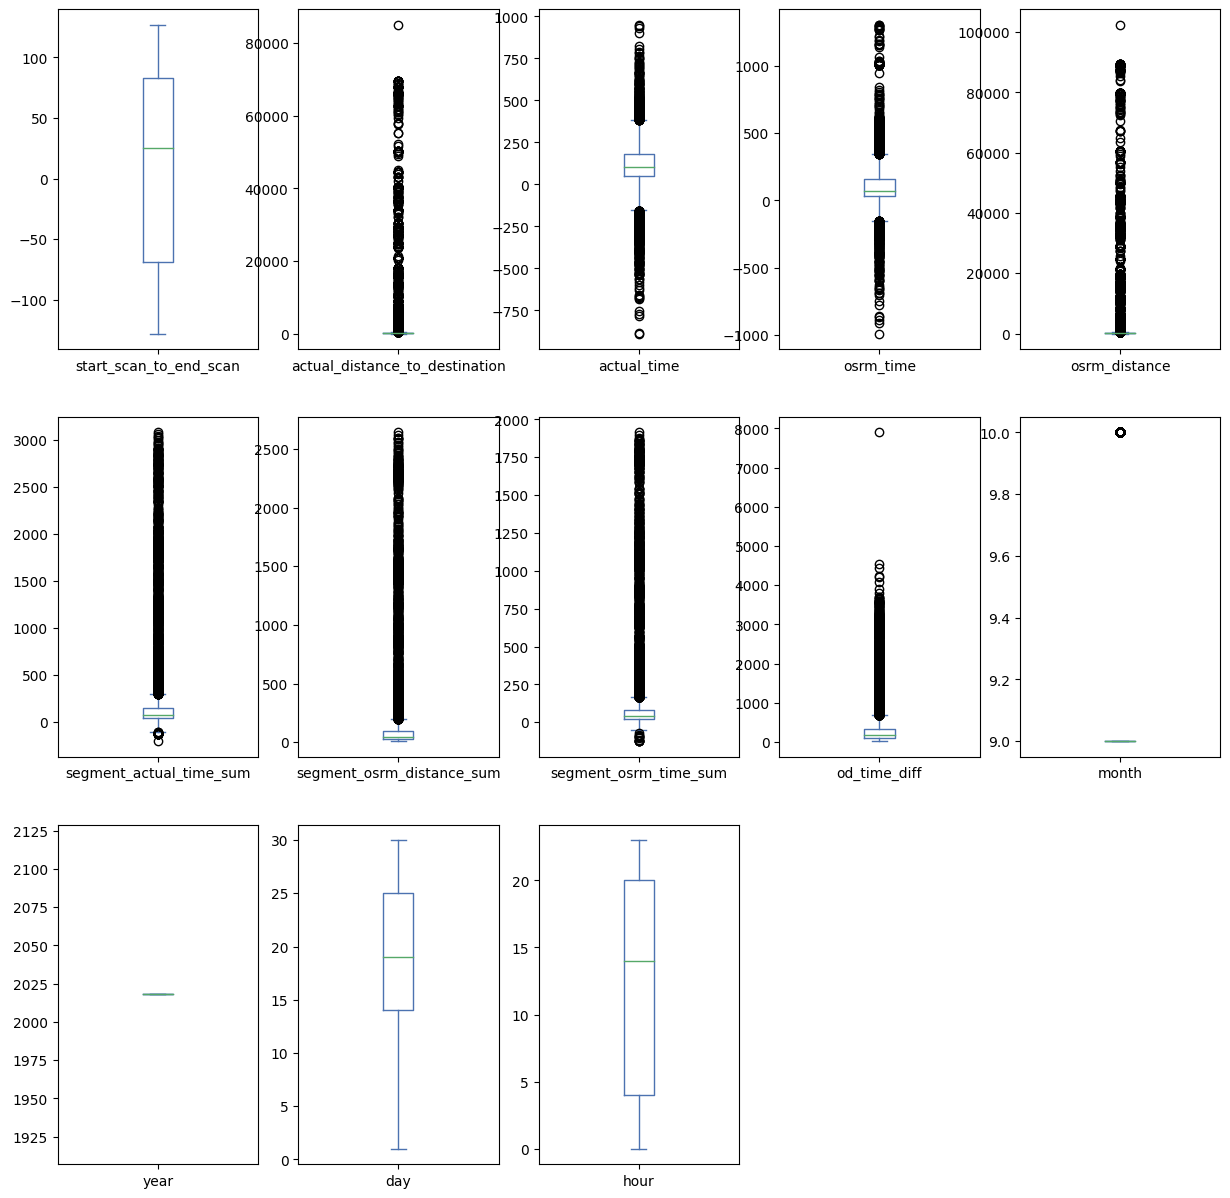

In [740]:
df2[numerical_columns].plot(kind='box', subplots = True, layout=(3 , int(np.ceil(len(numerical_columns)/3))), figsize=(15, 15))
plt.show()

In [741]:
iqr_values = df2[numerical_columns].quantile(0.75) - df2[numerical_columns].quantile(0.25)
print(iqr_values)

start_scan_to_end_scan            152.00
actual_distance_to_destination    169.69
actual_time                       135.00
osrm_time                         125.00
osrm_distance                     221.31
segment_actual_time_sum           102.00
segment_osrm_distance_sum          68.74
segment_osrm_time_sum              56.00
od_time_diff                      230.00
month                               0.00
year                                0.00
day                                11.00
hour                               16.00
dtype: float64


For Columns 'actual_distance_to_destination', 'actual_time', 'osrm_time' ,'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff' , IQR method of 'Removal' to be used as the values are far more spread out from the mean and their effect cannot be added to the data for further use as the data points are more than 10 times away from the mean.

In [742]:
numerical_columns_subset1 = []
for i in numerical_columns:
  if (2 * np.average(df2[i])) < max(df2[i]):
    numerical_columns_subset1.append(i)
numerical_columns_subset1

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_distance_sum',
 'segment_osrm_time_sum',
 'od_time_diff']

In [743]:
for i in numerical_columns_subset1:
  lower_bound = df2[i].quantile(0.25) - 1.5 * iqr_values[i]
  upper_bound = df2[i].quantile(0.75) + 1.5 * iqr_values[i]
  df2 = df2[(df2[i] >= lower_bound) & (df2[i] <= upper_bound)]

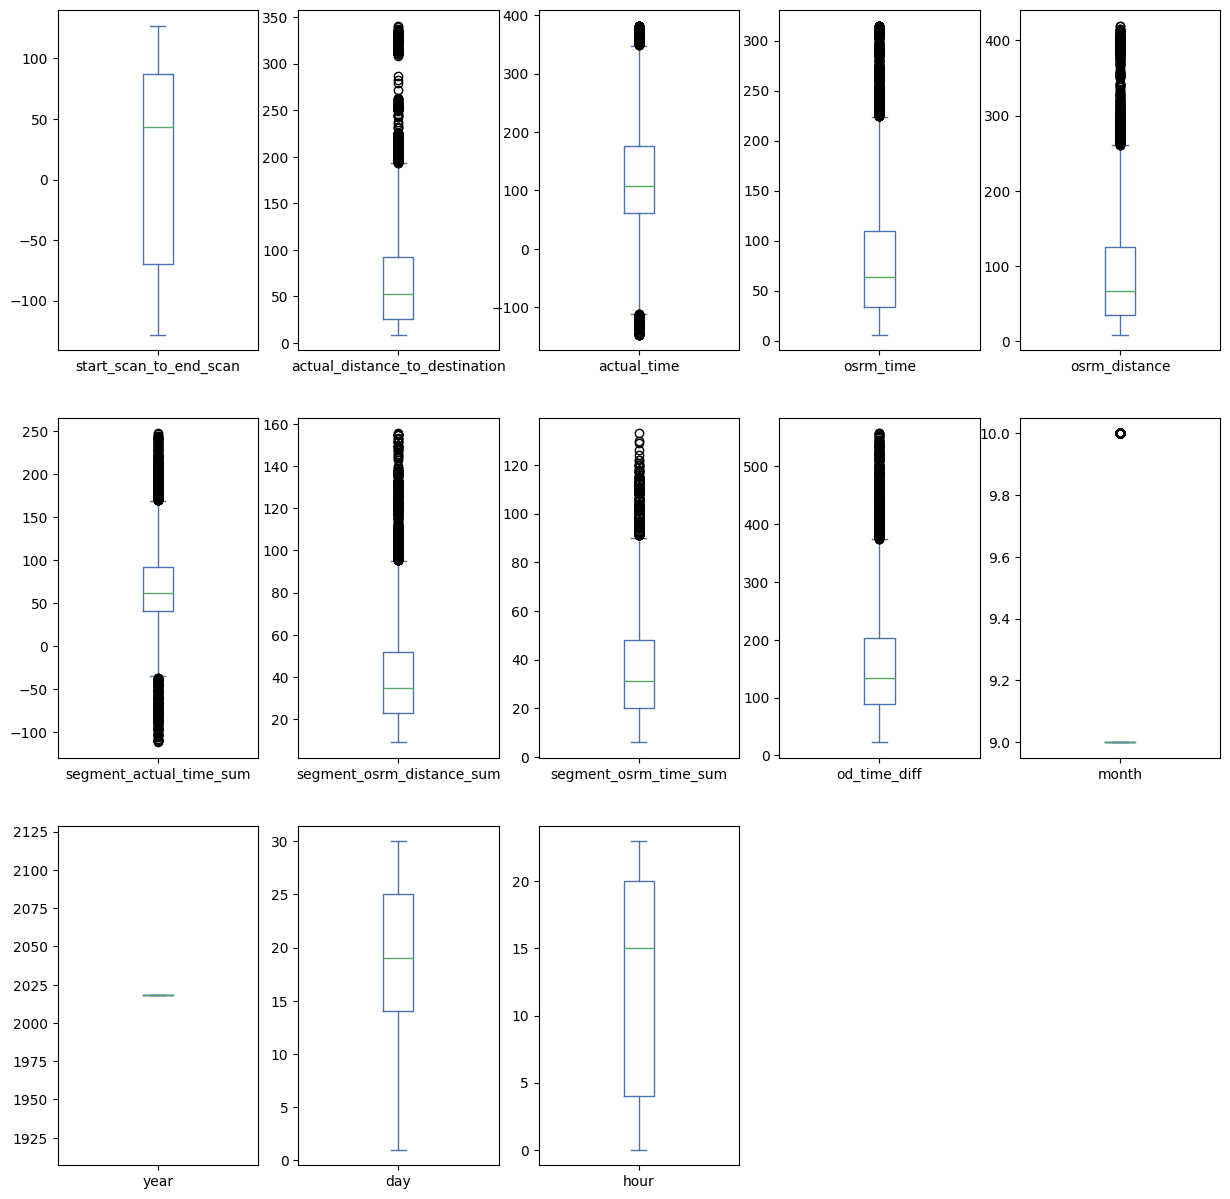

In [744]:
df2[numerical_columns].plot(kind='box', subplots = True, layout=(3 , int(np.ceil(len(numerical_columns)/3))), figsize=(15, 15))
plt.show()

In [745]:
df2.reset_index(drop=True , inplace = True)

In [746]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10860 entries, 0 to 10859
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       10860 non-null  object 
 1   data                            10860 non-null  object 
 2   route_type                      10860 non-null  object 
 3   start_scan_to_end_scan          10860 non-null  int8   
 4   actual_distance_to_destination  10860 non-null  float64
 5   actual_time                     10860 non-null  int64  
 6   osrm_time                       10860 non-null  int64  
 7   osrm_distance                   10860 non-null  float64
 8   segment_actual_time_sum         10860 non-null  int64  
 9   segment_osrm_distance_sum       10860 non-null  float64
 10  segment_osrm_time_sum           10860 non-null  int64  
 11  od_time_diff                    10860 non-null  int64  
 12  source_city                     

In [747]:
df2.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,...,od_time_diff,source_city,source_state,destination_city,destination_state,month,year,day,day_name,hour
0,trip-153671042288605164,training,Carting,58,53.31,96,55,60.31,46,28.20,...,59,Doddablpur,Karnataka,Chikblapur,Karnataka,9,2018,12,Wednesday,0
1,trip-153671046011330457,training,Carting,100,28.53,82,24,31.65,59,19.88,...,101,Unknown,Unknown,Mumbai,Maharashtra,9,2018,12,Wednesday,0
2,trip-153671052974046625,training,FTL,-104,126.28,21,97,135.04,147,63.64,...,153,Unknown,Unknown,Unknown,Unknown,9,2018,12,Wednesday,0
3,trip-153671055416136166,training,Carting,60,25.14,71,19,26.35,39,16.22,...,61,Unknown,Unknown,Chennai,Tamil Nadu,9,2018,12,Wednesday,0
4,trip-153671066201138152,training,Carting,98,9.10,24,13,12.02,24,12.02,...,99,Chennai,Tamil Nadu,Chennai,Tamil Nadu,9,2018,12,Wednesday,0


In [748]:
df2.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff,month,year,day,hour
count,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.000000,10860.0,10860.000000,10860.000000
mean,13.399908,74.252401,120.760405,83.738766,93.718844,69.743462,40.588769,36.479098,159.089411,9.125783,2018.0,18.375322,12.443738
std,83.137055,62.042412,92.977174,64.240687,75.569964,44.930642,24.648128,21.237010,95.744487,0.331620,0.0,8.015698,8.168006
min,-128.000000,9.000000,-147.000000,6.000000,9.070000,-112.000000,9.070000,6.000000,23.000000,9.000000,2018.0,1.000000,0.000000
25%,-70.000000,25.530000,61.000000,34.000000,34.435000,41.000000,23.027500,20.000000,89.000000,9.000000,2018.0,14.000000,4.000000
50%,43.000000,52.075000,107.000000,64.000000,67.475000,62.000000,34.730000,31.000000,134.000000,9.000000,2018.0,19.000000,15.000000
75%,87.000000,92.752500,176.000000,110.000000,125.027500,92.000000,51.902500,48.000000,203.250000,9.000000,2018.0,25.000000,20.000000
max,127.000000,340.760000,382.000000,315.000000,419.390000,247.000000,155.560000,133.000000,557.000000,10.000000,2018.0,30.000000,23.000000


Data Normalization

In [749]:
df2[numerical_columns_subset1]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff
0,58,53.31,96,55,60.31,46,28.20,26,59
1,100,28.53,82,24,31.65,59,19.88,16,101
2,-104,126.28,21,97,135.04,147,63.64,45,153
3,60,25.14,71,19,26.35,39,16.22,12,61
4,98,9.10,24,13,12.02,24,12.02,13,99
...,...,...,...,...,...,...,...,...,...
10855,-104,54.12,70,51,58.26,33,28.90,28,153
10856,60,25.13,33,19,26.54,21,16.09,11,61
10857,-8,46.63,36,61,74.28,190,35.44,36,249
10858,105,128.37,207,161,163.87,59,61.07,58,106


###As multiple colums are having the measurements like time and distances. They are needed for comparision with each other , by using StandardScaler, the 'Mean' value is missed and comarision cannot be carried out using statistical methods. The columns needed to be MinMaxScaloed based on the minimum and maximum value across similar attributes.

In [750]:
df2.columns

Index(['trip_uuid', 'data', 'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'od_time_diff', 'source_city', 'source_state',
       'destination_city', 'destination_state', 'month', 'year', 'day',
       'day_name', 'hour'],
      dtype='object')

In [751]:
distance_columns = ['actual_distance_to_destination','osrm_distance', 'segment_osrm_distance_sum']
time_columns = ['actual_time', 'osrm_time','segment_actual_time_sum', 'segment_osrm_time_sum', 'od_time_diff']

In [752]:
concatenated_data = np.concatenate([df2[attr].values.reshape(-1, 1) for attr in distance_columns], axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(concatenated_data)
scaled_data = scaled_data.reshape(-1, len(distance_columns))
df2[distance_columns] = pd.DataFrame(scaled_data, columns=distance_columns)
df2.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,...,od_time_diff,source_city,source_state,destination_city,destination_state,month,year,day,day_name,hour
0,trip-153671042288605164,training,Carting,58,0.133560,96,55,0.124878,46,0.130589,...,59,Doddablpur,Karnataka,Chikblapur,Karnataka,9,2018,12,Wednesday,0
1,trip-153671046011330457,training,Carting,100,0.058868,82,24,0.055030,59,0.073793,...,101,Unknown,Unknown,Mumbai,Maharashtra,9,2018,12,Wednesday,0
2,trip-153671052974046625,training,FTL,-104,0.353509,21,97,0.307004,147,0.372517,...,153,Unknown,Unknown,Unknown,Unknown,9,2018,12,Wednesday,0
3,trip-153671055416136166,training,Carting,60,0.048650,71,19,0.042113,39,0.048809,...,61,Unknown,Unknown,Chennai,Tamil Nadu,9,2018,12,Wednesday,0
4,trip-153671066201138152,training,Carting,98,0.000301,24,13,0.007190,24,0.020138,...,99,Chennai,Tamil Nadu,Chennai,Tamil Nadu,9,2018,12,Wednesday,0


In [753]:
concatenated_data = np.concatenate([df2[attr].values.reshape(-1, 1) for attr in time_columns], axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(concatenated_data)
scaled_data = scaled_data.reshape(-1, len(time_columns))
df2[time_columns] = pd.DataFrame(scaled_data, columns=time_columns)
df2.head()

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,...,od_time_diff,source_city,source_state,destination_city,destination_state,month,year,day,day_name,hour
0,trip-153671042288605164,training,Carting,58,0.133560,0.459357,0.158576,0.124878,0.440111,0.130589,...,0.067416,Doddablpur,Karnataka,Chikblapur,Karnataka,9,2018,12,Wednesday,0
1,trip-153671046011330457,training,Carting,100,0.058868,0.432892,0.058252,0.055030,0.476323,0.073793,...,0.146067,Unknown,Unknown,Mumbai,Maharashtra,9,2018,12,Wednesday,0
2,trip-153671052974046625,training,FTL,-104,0.353509,0.317580,0.294498,0.307004,0.721448,0.372517,...,0.243446,Unknown,Unknown,Unknown,Unknown,9,2018,12,Wednesday,0
3,trip-153671055416136166,training,Carting,60,0.048650,0.412098,0.042071,0.042113,0.420613,0.048809,...,0.071161,Unknown,Unknown,Chennai,Tamil Nadu,9,2018,12,Wednesday,0
4,trip-153671066201138152,training,Carting,98,0.000301,0.323251,0.022654,0.007190,0.378830,0.020138,...,0.142322,Chennai,Tamil Nadu,Chennai,Tamil Nadu,9,2018,12,Wednesday,0


In [754]:
df2[categorical_columns].nunique()

trip_uuid            10860
data                     2
route_type               2
source_city            561
source_state            26
destination_city       668
destination_state       27
day_name                 7
dtype: int64

As number of unique entities are higher in all but 2, i.e. data and route_type. One Hot Encoding is preffered over those two attributes as they do not increase dimensionality of the data by much.

Hypothesis Testing

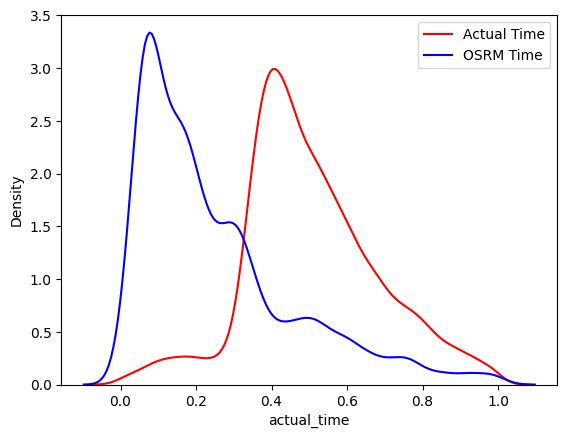

In [755]:
# 1. OSRM Time vs Actual Time
sns.kdeplot(df2['actual_time'], color= 'red', label = 'Actual Time')
sns.kdeplot(df2['osrm_time'], color = 'blue', label = 'OSRM Time')

plt.legend()
plt.show()

Based on the grahical nature of both the curves the left-handed Relative T-test is selected as the best statistical tool to analyse the nature of both values.

In [756]:
H0 = 'Failed to reject Null Hypothesis.  OSRM time and Actual Time for the delivery are same.With P-Value of'
Ha = 'Null Hypothesis is Rejected. Actual Time is greater than the OSRM time. With P-Value of'

stat, pvalue = ttest_rel(df2['actual_time'],df2['osrm_time'],alternative = 'greater')
alpha = 0.05

if pvalue < alpha:
  print(f"{Ha} {pvalue.round(2)}")
else :
  print(f"{H0} {pvalue.round(2)}")

Null Hypothesis is Rejected. Actual Time is greater than the OSRM time. With P-Value of 0.0


In [757]:
ttest_rel(df2['actual_time'],df2['osrm_time'],alternative = 'greater')

TtestResult(statistic=124.96971893911095, pvalue=0.0, df=10859)

Observatins:
1.   The spread of both the data i.e. Actual Time and OSRM time are similar.
2.   The mean of Actual time is higher than the OSRM time.
3.   The OSRM time and Actual time are different from one another.
4.   Actual Time is greater than the OSRM time for the deliveries.
5.   The OSRM time does not denote the Actual delivery time accurately. The OSRM delivery time is not a good measure of the actual time to be used for planning deliveries.
6. The OSRM time is required to be corrected for more accurate delivery planning.

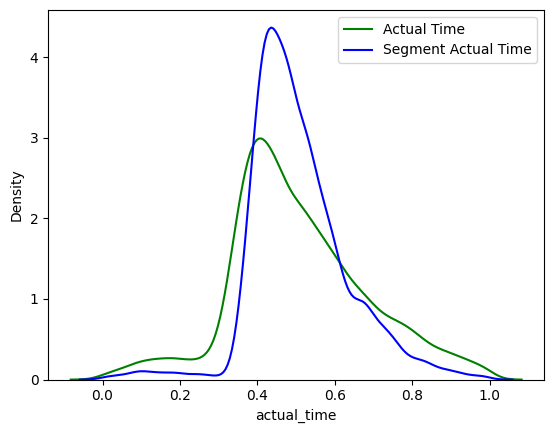

In [758]:
#2. Actual Time vs Segment Actual Time

sns.kdeplot(df2['actual_time'], color= 'green', label = 'Actual Time')
sns.kdeplot(df2['segment_actual_time_sum'], color = 'blue', label = 'Segment Actual Time')

plt.legend()
plt.show()

Based on the grahical nature of both the curves the two-sided Relative T-test is selected as the best statistical tool to analyse the nature of both values.

In [759]:
H0 = 'Failed to reject Null Hypothesis. Segment Actual Time and Actual Time for the delivery are similar. With P-Value of'
Ha = 'Null Hypothesis is Rejected. Actual Time and Segement Actual time are not same. With P-Value of'

stat, pvalue = ttest_rel(df2['actual_time'],df2['segment_actual_time_sum'],alternative = 'two-sided')
alpha = 0.05

if pvalue < alpha:
  print(f"{Ha} {pvalue.round(2)}")
else :
  print(f"{H0} {pvalue.round(2)}")

Failed to reject Null Hypothesis. Segment Actual Time and Actual Time for the delivery are similar. With P-Value of 0.96


Observatins:
1.   The spread of both the data i.e. Actual Time and Actual Segment time are similar.
2.   The mean of Actual time is in same range in that of segment Actual time.
3.   The Segment Actual time and Actual time are denoting the same things.
4.   Actual Time is similar to Actual Segment time for the deliveries.
5.   The Actual Segment time does denote the Actual delivery time accurately. The Actual Segment delivery time is a good measure of the actual time to be used for planning deliveries.

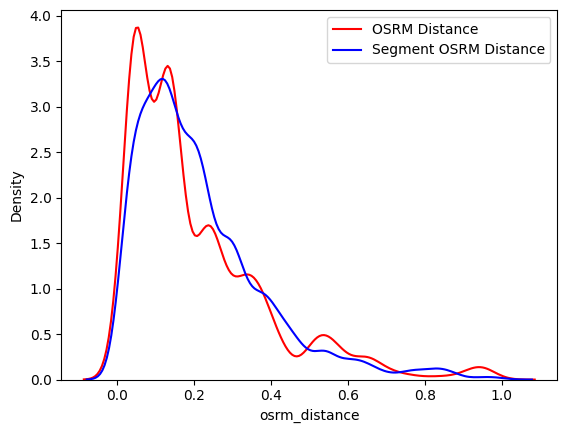

In [760]:
# 3. OSRM Distance vs Segment OSRM Distance
sns.kdeplot(df2['osrm_distance'], color= 'red', label = 'OSRM Distance')
sns.kdeplot(df2['segment_osrm_distance_sum'], color = 'blue', label = 'Segment OSRM Distance')

plt.legend()
plt.show()

Based on the grahical nature of both the curves the left sided Relative T-test is selected as the best statistical tool to analyse the nature of both values.

In [761]:
#OSRM Distance vs Segment OSRM Distance
H0 = 'Failed to reject Null Hypothesis. OSRM Distance is greater than Segment OSRM Distance for the delivery are similar. With P-Value of'
Ha = 'Null Hypothesis is Rejected. Segment OSRM Distance is not less than the OSRM Distance. With P-Value of'

stat, pvalue = ttest_rel(df2['osrm_distance'],df2['segment_osrm_distance_sum'],alternative = 'greater')
alpha = 0.05

if pvalue < alpha:
  print(f"{Ha} {pvalue.round(2)}")
else :
  print(f"{H0} {pvalue.round(2)}")

Failed to reject Null Hypothesis. OSRM Distance is greater than Segment OSRM Distance for the delivery are similar. With P-Value of 1.0


Observatins:
1.   The spread of both the data i.e. Segment OSRM Distance and OSRM Distance are similar.
2.   The mean of OSRM Distance is higher than the Segment OSRM Distance.
3.   The OSRM Distance and Segment OSRM Distance are different from one another.
4.   OSRM Distance is greater than the Segment OSRM Distance for the deliveries.
5.   Use of OSRM distance data might lead to allocation of excessive resources. Leading to requirement of higher cost and rsource requirement.
6. The OSRM distance is required to be corrected for more accurate delivery planning.

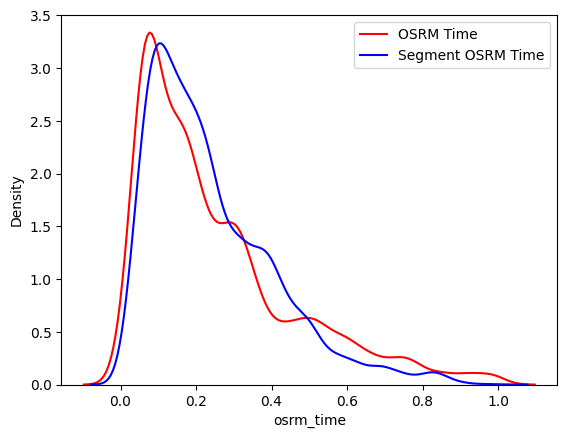

In [762]:
#4. OSRM Time vs Segment OSRM Time
sns.kdeplot(df2['osrm_time'], color= 'red', label = 'OSRM Time')
sns.kdeplot(df2['segment_osrm_time_sum'], color = 'blue', label = 'Segment OSRM Time')

plt.legend()
plt.show()

Based on the grahical nature of both the curves the right sided Relative T-test is selected as the best statistical tool to analyse the nature of both values.

In [763]:
#4. OSRM Time vs Segment OSRM Time
H0 = 'Failed to reject Null Hypothesis. OSRM time is less than Segment OSRM Time for the delivery are similar. With P-Value of'
Ha = 'Null Hypothesis is Rejected. Segment OSRM Time is not less than the Segment OSRM Time. With P-Value of'

stat, pvalue = ttest_rel(df2['osrm_time'],df2['segment_osrm_time_sum'],alternative = 'less')
alpha = 0.05

if pvalue < alpha:
  print(f"{Ha} {pvalue.round(2)}")
else :
  print(f"{H0} {pvalue.round(2)}")

Failed to reject Null Hypothesis. OSRM time is less than Segment OSRM Time for the delivery are similar. With P-Value of 1.0


Observatins:
1.   The spread of both the data i.e. Segment OSRM Time and OSRM Time are similar.
2.   The mean of OSRM Time is less than the Segment OSRM Time.
3.   The OSRM Time and Segment OSRM time are different from one another.
4.   OSRM time is less than the Segment OSRM Distance for the deliveries.
5.   Use of OSRM time data is better estimatior for planning for deliveries than the Segment OSRM Time.

In [764]:
[i for i in df2['source_city'].unique() if len(i) < 4]

['FBD',
 'CCU',
 'MAA',
 'BOM',
 'Pen',
 'BLR',
 'Del',
 'Cjb',
 'Amd',
 'Goa',
 'Hyd',
 'Mau']

In [765]:
city_name_dict = {'FBD' : 'Ayodhya', 'CCU' : 'Kolkata', 'MAA' : 'Chennai' , 'BOM' :'Mumbai', 'BLR' : 'Benguluru', 'Bangalore' : 'Benguluru',
                  'Del' : 'Delhi' , 'Cjb' : 'Coimbatore', 'AMD' : 'Ahmedabad', 'Hyd' : 'Hyderabad', 'Madras' : 'Chennai', 'Bengaluru' : 'Benguluru', 'Amd' : 'Ahmedabad'}
def city_dict(a):
  if a in city_name_dict:
    return city_name_dict[a]
  else:
    return a

df2['source_city'] = df2['source_city'].apply(lambda x: city_dict(x))

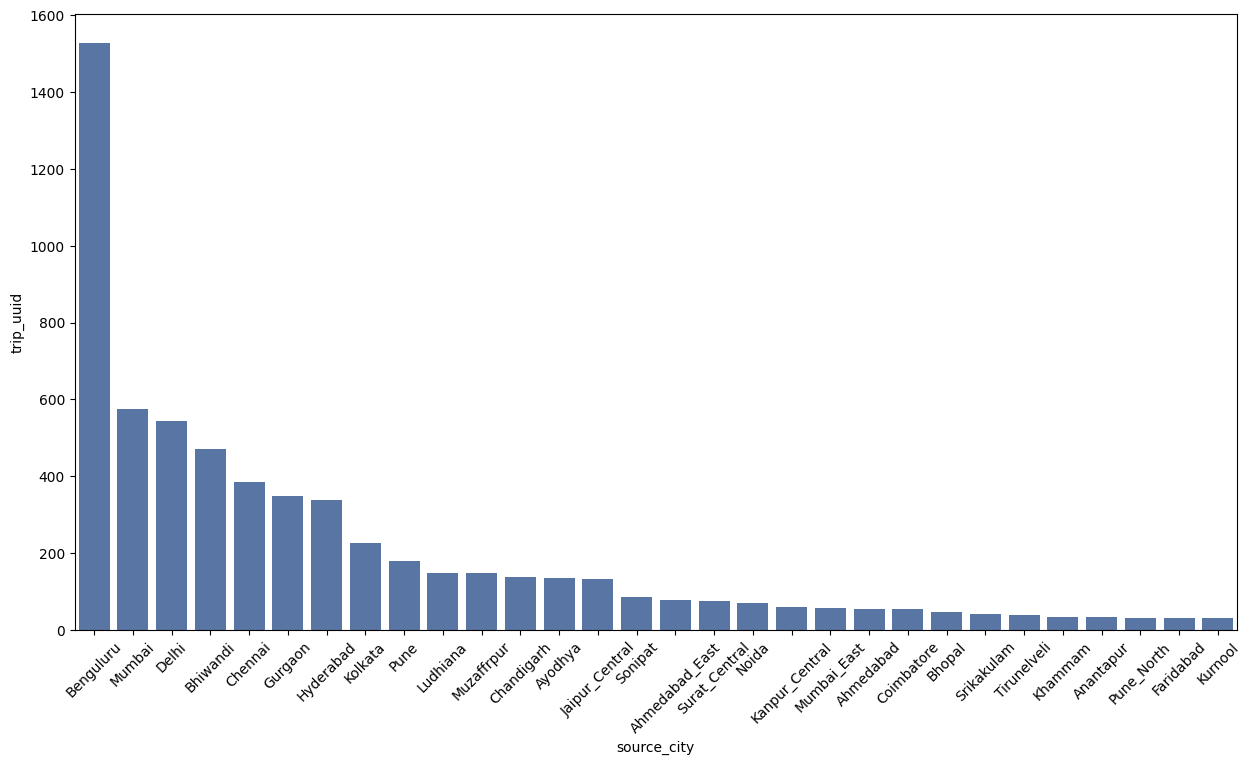

In [766]:
source_city_count = df2[df2['source_city'] != 'Unknown'].groupby('source_city').agg({'trip_uuid' : 'nunique'})
source_city_count = source_city_count.sort_values(by = 'trip_uuid',ascending = False).iloc[0:30,:]
plt.figure(figsize = (15,8))
sns.barplot(x='source_city', y='trip_uuid', data=source_city_count)
plt.xticks(rotation = 45)
plt.show()

In [767]:
destination_abbr = [i for i in df2['destination_city'].unique() if len(i)<4]
destination_abbr

['MAA', 'BLR', 'FBD', 'CCU', 'Del', 'Goa', 'Hyd', 'Mau', 'Amd', 'Una', 'Cjb']

In [768]:
df2['destination_city'] = df2['destination_city'].apply(lambda x: city_dict(x))

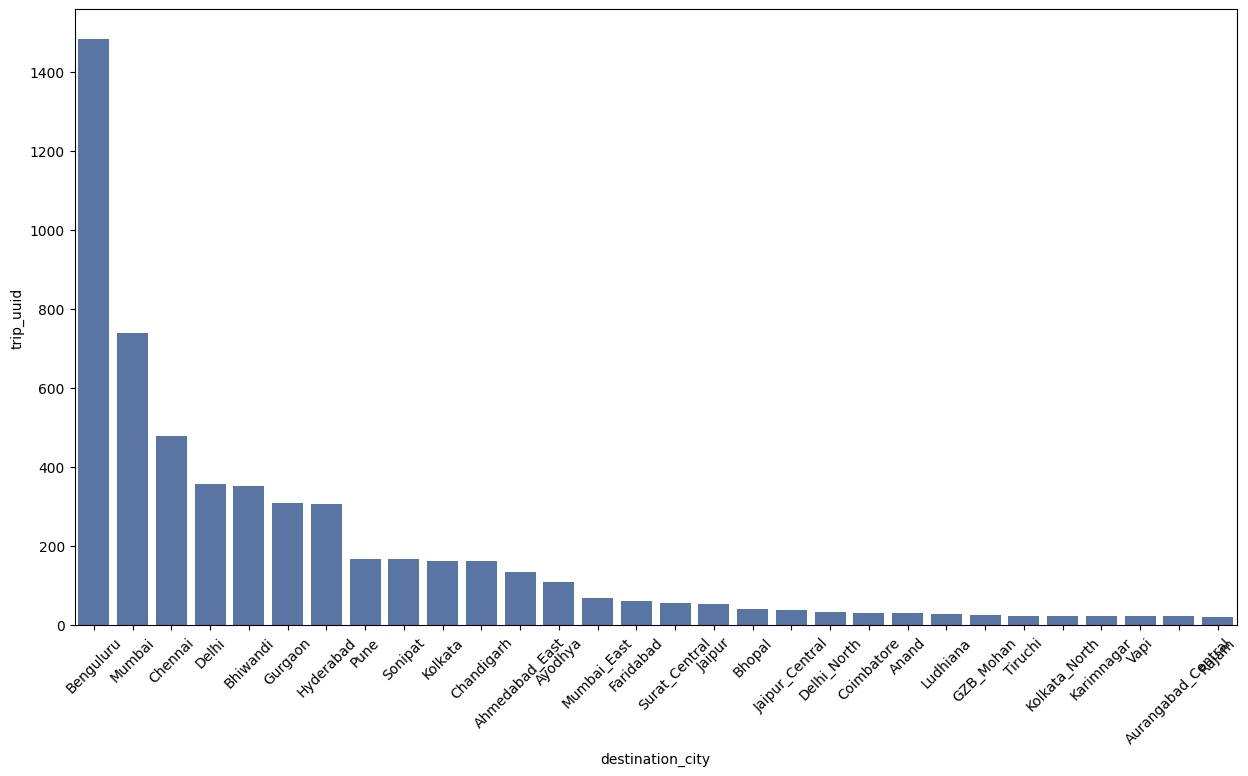

In [769]:
destination_city_count = df2[df2['destination_city'] != 'Unknown'].groupby('destination_city').agg({'trip_uuid' : 'nunique'})
destination_city_count = destination_city_count.sort_values(by = 'trip_uuid',ascending = False).iloc[0:30,:]
plt.figure(figsize = (15,8))
sns.barplot(x='destination_city', y='trip_uuid', data=destination_city_count)
plt.xticks(rotation = 45)
plt.show()

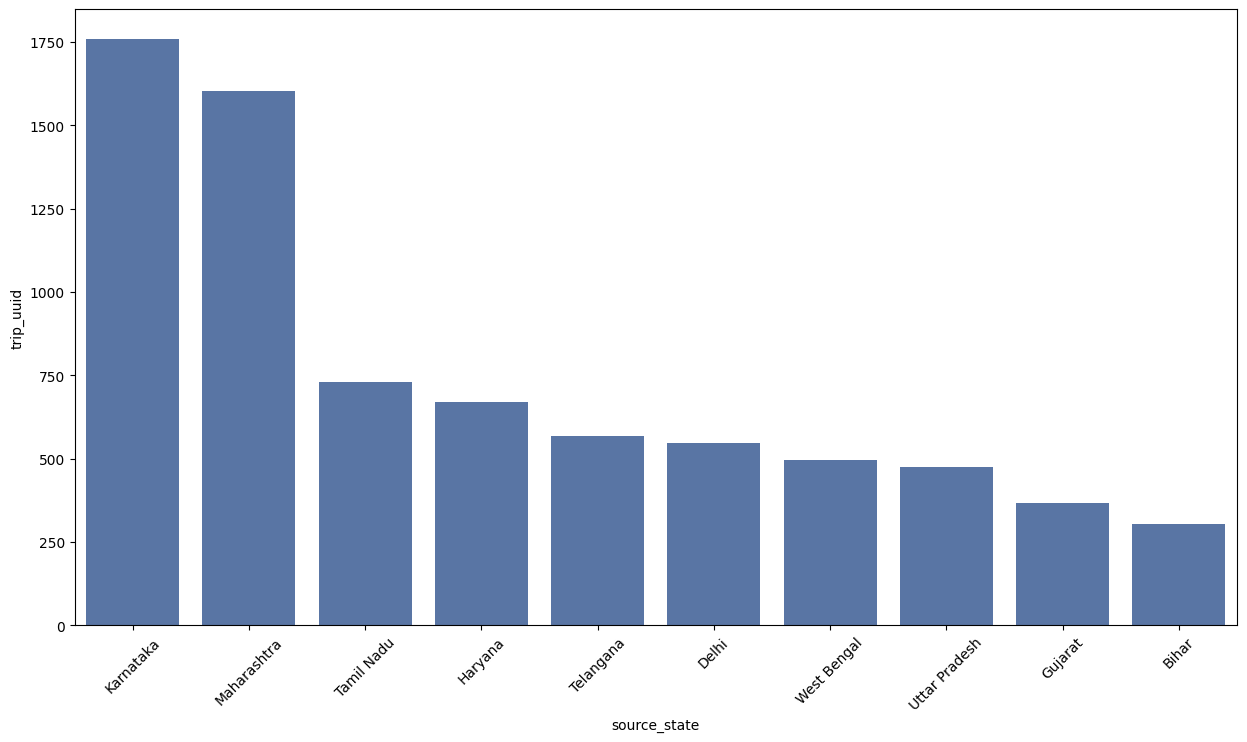

In [770]:
source_state_count = df2[df2['source_state'] != 'Unknown'].groupby('source_state').agg({'trip_uuid' : 'nunique'})
source_state_count = source_state_count.sort_values(by = 'trip_uuid',ascending = False).iloc[0:10,:]
plt.figure(figsize = (15,8))
sns.barplot(x='source_state', y='trip_uuid', data=source_state_count)
plt.xticks(rotation = 45)
plt.show()

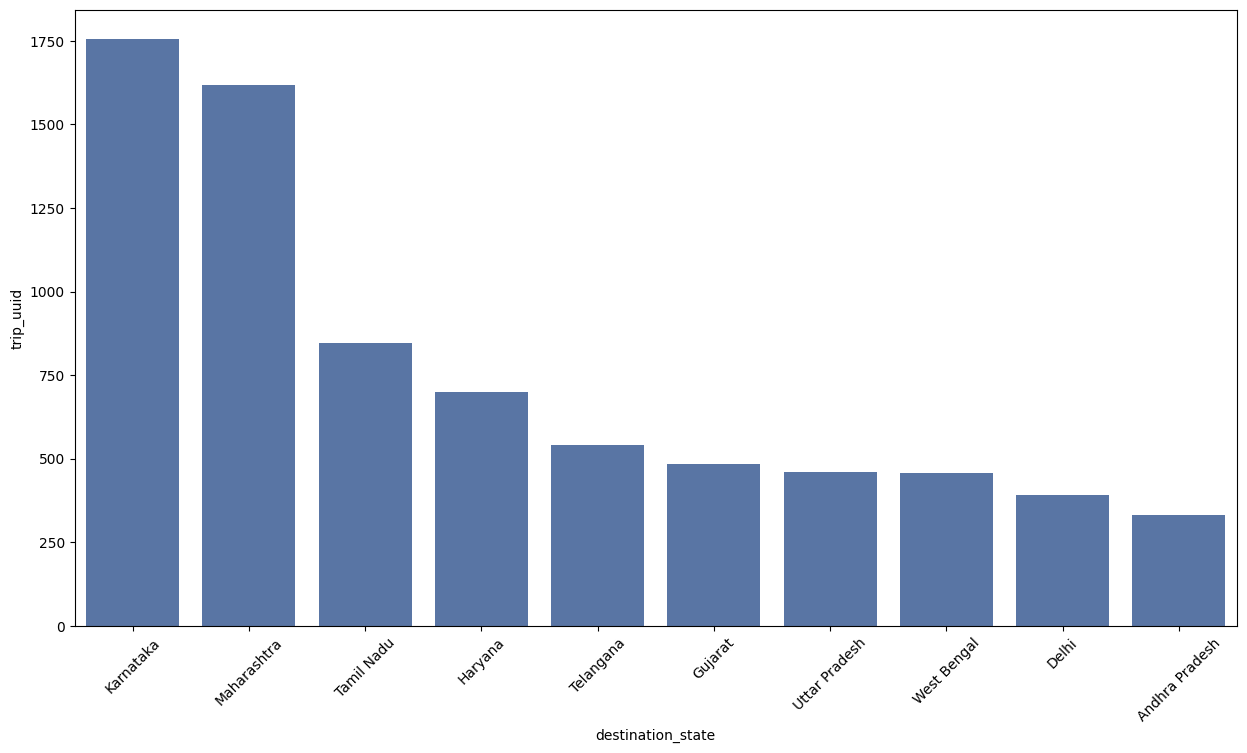

In [771]:
destination_state_count = df2[df2['destination_state'] != 'Unknown'].groupby('destination_state').agg({'trip_uuid' : 'nunique'})
destination_state_count = destination_state_count.sort_values(by = 'trip_uuid',ascending = False).iloc[0:10,:]
plt.figure(figsize = (15,8))
sns.barplot(x='destination_state', y='trip_uuid', data=destination_state_count)
plt.xticks(rotation = 45)
plt.show()

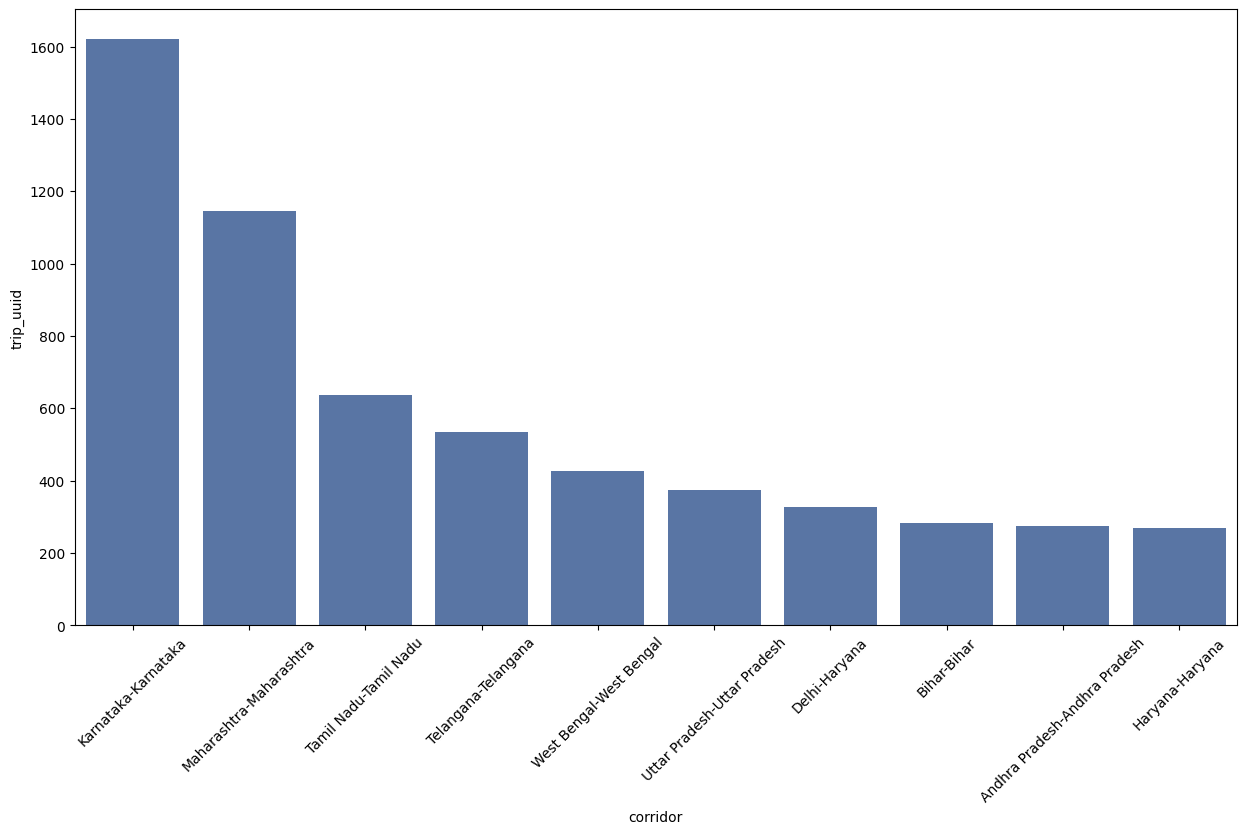

In [772]:
state_corridor = df2[(df2['destination_state'] != 'Unknown') & (df2['source_state'] != 'Unknown')].groupby(['source_state', 'destination_state']).agg({'trip_uuid': 'nunique'})
state_corridor = state_corridor.sort_values(by = 'trip_uuid',ascending = False).iloc[0:10,:].reset_index()
state_corridor['corridor'] = state_corridor['source_state'] +  '-' +state_corridor['destination_state']
plt.figure(figsize = (15,8))
sns.barplot(x='corridor', y='trip_uuid', data=state_corridor)
plt.xticks(rotation = 45)
plt.show()

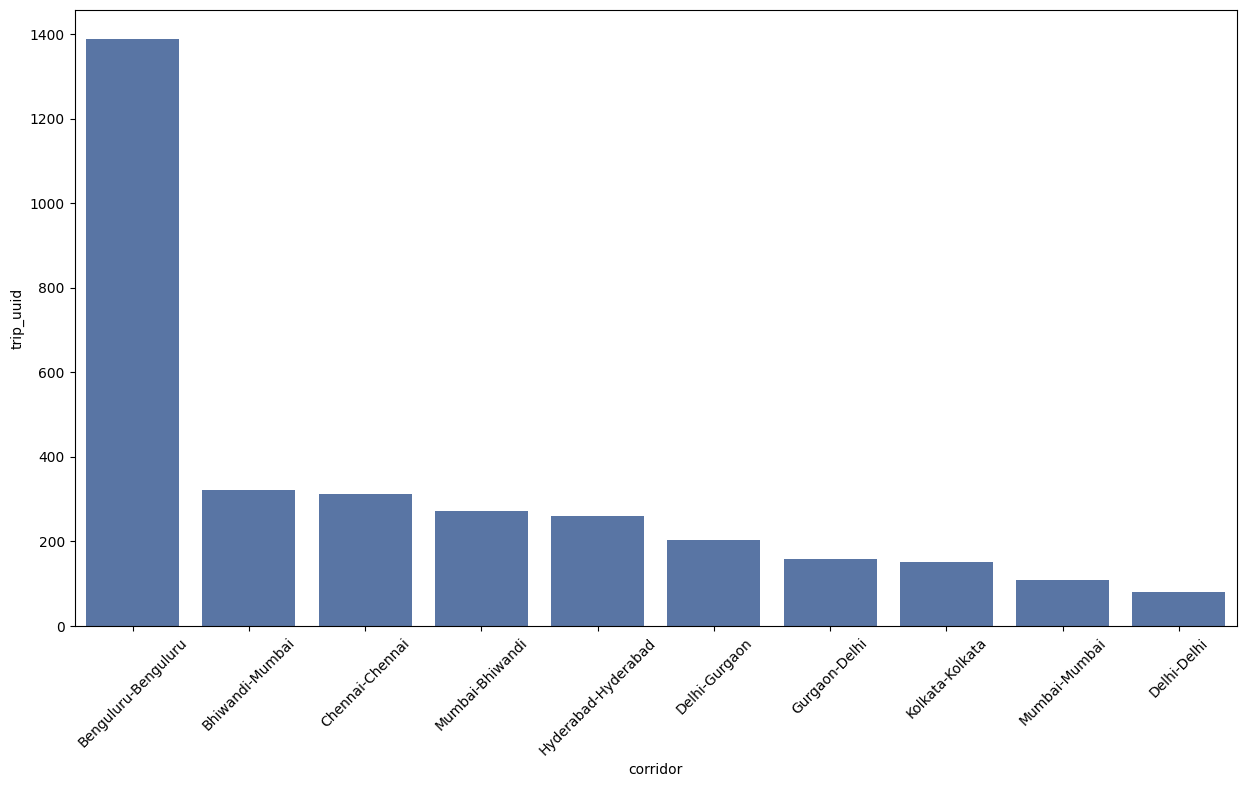

In [773]:
city_corridor = df2[(df2['destination_city'] != 'Unknown') & (df2['source_city'] != 'Unknown')].groupby(['source_city', 'destination_city']).agg({'trip_uuid': 'nunique'})
city_corridor = city_corridor.sort_values(by = 'trip_uuid',ascending = False).iloc[0:10,:].reset_index()
city_corridor['corridor'] = city_corridor['source_city'] +  '-' +city_corridor['destination_city']
plt.figure(figsize = (15,8))
sns.barplot(x='corridor', y='trip_uuid', data=city_corridor)
plt.xticks(rotation = 45)
plt.show()

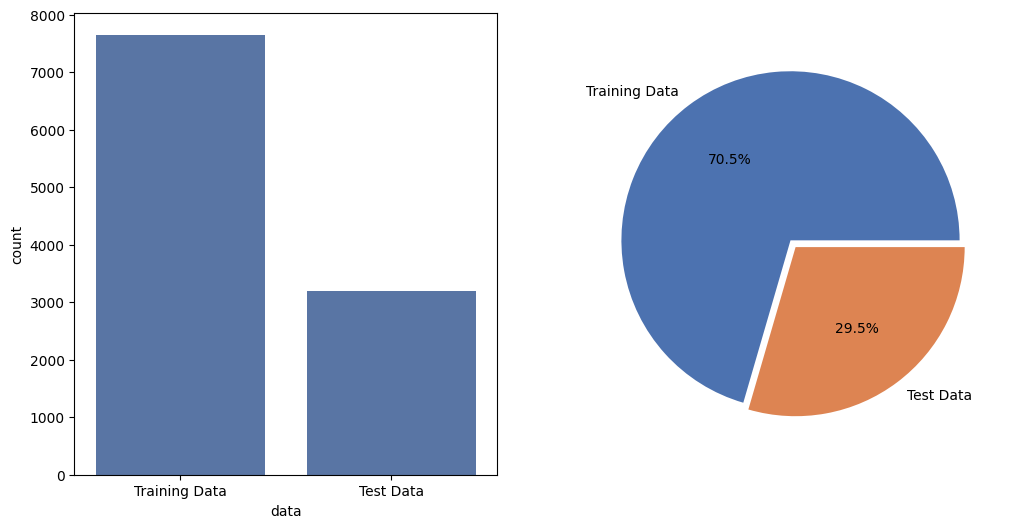

In [774]:
plt.figure(figsize=(12, 6))

# First subplot: Count plot
plt.subplot(121)
sns.countplot(data = df2, x='data')
plt.xticks(ticks=['training' , 'test'], labels=['Training Data', 'Test Data'])

# Second subplot: Pie chart
plt.subplot(122)
plt.pie(df2['data'].value_counts(), autopct='%1.1f%%', explode=[0.025, 0.025], labels=['Training Data', 'Test Data'])

plt.show()

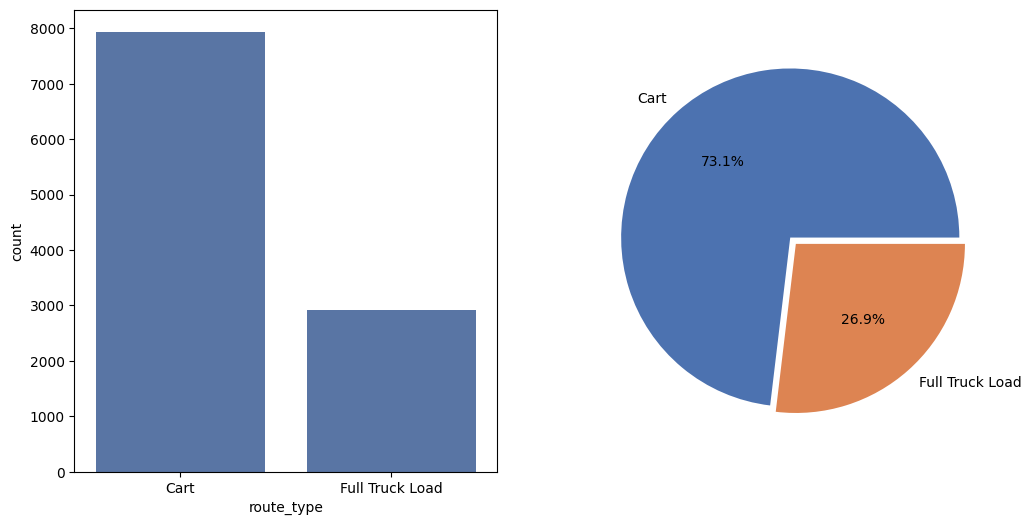

In [775]:
plt.figure(figsize=(12, 6))

# First subplot: Count plot
plt.subplot(121)
sns.countplot(data = df2, x='route_type')
plt.xticks(ticks=['Carting' , 'FTL'], labels=['Cart', 'Full Truck Load'])

# Second subplot: Pie chart
plt.subplot(122)
plt.pie(df2['route_type'].value_counts(), autopct='%1.1f%%', explode=[0.025, 0.025], labels=['Cart', 'Full Truck Load'])

plt.show()

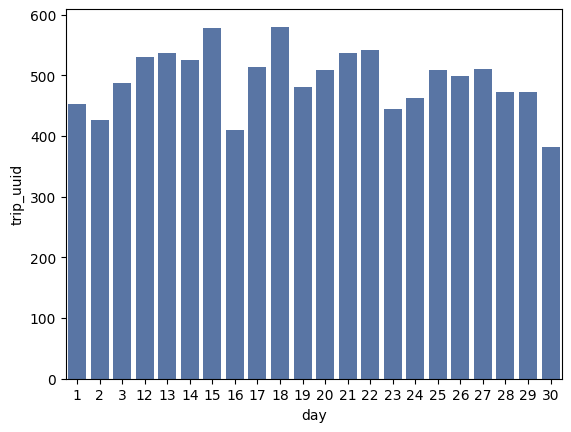

In [776]:
df2_day = df2.groupby('day').agg({'trip_uuid' : 'nunique'}).reset_index().sort_values(by = 'day')
sns.barplot(data = df2_day, x = 'day', y= 'trip_uuid')
plt.show()

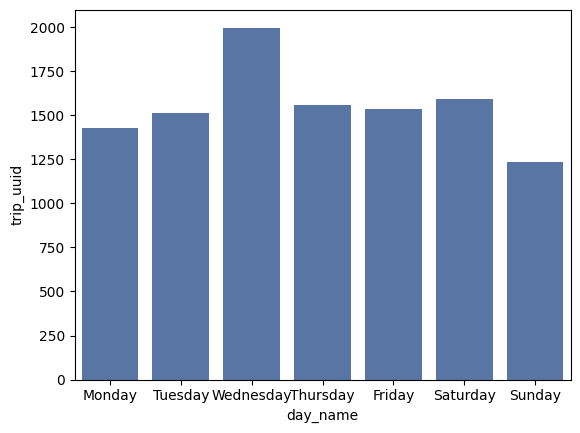

In [783]:
df2_dayname = df2.groupby('day_name').agg({'trip_uuid' : 'nunique'}).reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2_dayname['day_name'] = pd.Categorical(df2_dayname['day_name'], categories=day_order, ordered=True)
sns.barplot(data = df2_dayname, x = 'day_name', y= 'trip_uuid')
plt.show()

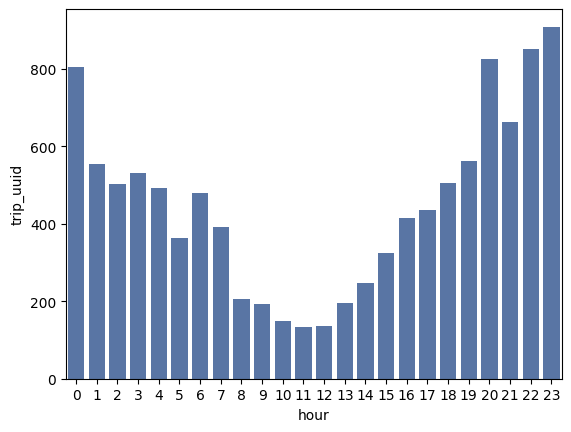

In [784]:
df2_hour = df2.groupby('hour').agg({'trip_uuid' : 'nunique'}).reset_index().sort_values('hour')
sns.barplot(data = df2_hour, x = 'hour', y= 'trip_uuid')
plt.show()

#Insights

1. **Delivery Data Overview:**
   - We have a comprehensive dataset covering 14,817 unique deliveries.
   - The data spans a period of three weeks, from September 12, 2018, to October 3, 2018.

2. **Vendor and Customer Distribution:**
   - We operate with 1,508 source centers (vendor locations) and 1,481 destination centers (customer locations).
   - Our network is extensive, reflecting our commitment to serving diverse locations efficiently.

3. **Data Utilization for ML Models:**
   - A significant portion of our data, accounting for 70.5%, is dedicated to training machine learning models.
   - The remaining 29.5% serves as test data, ensuring the robustness and accuracy of our predictive analytics.

4. **Delivery Size Breakdown:**
   - Our deliveries predominantly consist of cart-sized shipments, constituting 73.1% of our operations.
   - Full truckload shipments make up the remaining 26.9%, reflecting our versatility in catering to varying shipment sizes.

5. **Key Market Centers:**
   - Our top-performing cities for vendor locations and customer demand are Bengaluru and Mumbai.
   - This highlights the importance of these markets in our overall strategy and customer engagement efforts.

6. **Regional Focus:**
   - Karnataka and Maharashtra emerge as the leading states for both vendor locations and customer base.
   - We prioritize resources and tailor strategies to capitalize on the opportunities presented by these key regions.

7. **Business Corridor Analysis:**
   - Our primary business corridors lie within Karnataka-Karnataka and Maharashtra-Maharashtra routes.
   - This underscores the significance of intra-state logistics optimization in driving operational efficiency.

8. **Operational Trends:**
   - Wednesdays and Saturdays witness the highest volume of trip creations, indicating peak activity periods.
   - Late-night and early-morning hours, particularly between 10:00 PM and 02:00 AM, are our busiest times for trip creation.

9. **Performance Metrics:**
   - While actual time aggregated values differ significantly from OSRM time aggregated values, segment actual time aggregated values align closely.
   - Similarly, OSRM distance and time aggregated values exhibit statistical similarity with segment OSRM distance and time aggregated values.
  
These insights provide valuable guidance for strategic decision-making, resource allocation, and operational enhancements aimed at improving efficiency, customer satisfaction, and overall business performance.

#Recommendations

### 1. **Optimize Delivery Schedules and Routes**
- **Night and Early Morning Deliveries:** Since most trips are created between 10:00 PM and 02:00 AM, consider focusing resources (drivers, support staff, etc.) during these hours to enhance efficiency.
- **Reduce Daytime Deliveries:** Given the minimum activity at 11:00 AM, reassess the need for daytime deliveries. This can reduce congestion and improve resource allocation.
- **Use Reliable Route Planning Tools:** The statistically significant difference between actual and OSRM times suggests a need for more reliable route planning tools. Continuously compare actual travel times with predicted times and adjust routes accordingly.

### 2. **Focus on Key Business Corridors**
- **Karnataka and Maharashtra Dominance:** With top vendor and customer locations in Karnataka and Maharashtra, prioritize logistical resources and support in these states. Enhance infrastructure and partnerships in these regions to streamline operations.
- **Intra-state Optimization:** Since the top corridors are within Karnataka and Maharashtra, ensure optimized intra-state logistics networks. Consider state-specific strategies to improve delivery speed and reliability.

### 3. **Enhance Vendor and Customer Experience**
- **Top Cities and States Focus:** Prioritize service quality in Bengaluru and Mumbai, as they are the top cities for vendors and customers. Implement feedback loops and tailored services to maintain high satisfaction levels.
- **Cart Size vs. Full Truck Load:** With 73.1% of deliveries being of cart size, focus on optimizing smaller, more frequent deliveries. Develop tailored services for full truck load deliveries to maximize efficiency.

### 4. **Strategic Use of Training and Test Data**
- **ML Model Training:** Utilize the 70.5% of data allocated for training machine learning models to develop predictive analytics for delivery times, route optimization, and demand forecasting.
- **Testing and Validation:** Use the 29.5% test data to continually validate and refine these models. Ensure models are robust and reliable in real-world scenarios.

### 5. **Improvement in Data Accuracy and Usage**
- **Segment Analysis:** Since actual time aggregated values and segment actual times are statistically similar, focus on segment-specific analysis for more granular insights. This can help identify specific areas for improvement within the delivery process.
- **Distance and Time Analysis:** Given the similarity between OSRM and segment distances and times, use these metrics to refine and validate routing algorithms. Continuously update these models to reflect real-time conditions and improve accuracy.

### 6. **Operational Adjustments Based on Activity Trends**
- **Wednesday and Saturday Peaks:** Prepare for increased activity on Wednesdays and Saturdays by ensuring adequate staffing and resource availability. Implement dynamic scheduling to accommodate these peaks.
- **Delivery Time Windows:** Given the trend of late-night and early-morning deliveries, offer flexible delivery windows to customers to match these peak times, improving customer satisfaction and operational efficiency.

### 7. **Resource Allocation and Infrastructure Development**
- **Strategic Infrastructure Investments:** Focus on enhancing infrastructure in Karnataka and Maharashtra, particularly in Bengaluru and Mumbai, to support the high volume of deliveries.
- **Vendor and Customer Support:** Provide robust support systems for vendors in top cities to streamline the supply chain and improve reliability.

### 8. **Customer-Centric Strategies**
- **Feedback Mechanisms:** Implement feedback systems for customers in top regions to understand their needs and improve service quality.
- **Customized Services:** Develop and offer services tailored to the specific needs of customers in high-demand areas, such as expedited delivery options and real-time tracking.

By implementing these recommendations, the business can enhance operational efficiency, optimize resource allocation, improve customer satisfaction, and support growth in key regions.